In [ ]:
# Upload the dataset (ZIP file) manually in Colab
from google.colab import files
import zipfile
import os

In [ ]:
import zipfile

zip_path = "/content/Braille Dataset.zip"  # Change to your uploaded file name
extract_to = "/content/Braille_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")


Extraction complete!


In [ ]:
import os

dataset_path = "/content/Braille_dataset/Braille Dataset"  # Adjust if needed
print("Files in dataset directory:", os.listdir(dataset_path)[:5])  # Show first 5 files


Files in dataset directory: ['y1.JPG4dim.jpg', 'j1.JPG12rot.jpg', 'd1.JPG17whs.jpg', 'r1.JPG7dim.jpg', 'r1.JPG17rot.jpg']


In [ ]:
from pathlib import Path

image_dir = Path(dataset_path)
dir_list = list(image_dir.glob('*.jpg'))

image_count = len(dir_list)
print("Total images:", image_count)


Total images: 1560


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import cv2

In [ ]:
for i, path in enumerate(dir_list[:5]):  # Print first 5 paths
    print(f"Image {i+1}: {path}")


Image 1: /content/Braille_dataset/Braille Dataset/y1.JPG4dim.jpg
Image 2: /content/Braille_dataset/Braille Dataset/j1.JPG12rot.jpg
Image 3: /content/Braille_dataset/Braille Dataset/d1.JPG17whs.jpg
Image 4: /content/Braille_dataset/Braille Dataset/r1.JPG7dim.jpg
Image 5: /content/Braille_dataset/Braille Dataset/r1.JPG17rot.jpg


In [ ]:
name_list = [os.path.basename(i)[0] for i in dir_list]

# Load images
images = [cv2.imread(str(dir)) for dir in dir_list]

In [ ]:
# Convert to numpy arrays
images_list = np.array(images)
name_list = np.array(name_list).T

# Encode labels and normalize images
le = LabelEncoder()
name_list = le.fit_transform(name_list)
images_list = images_list / 255.0

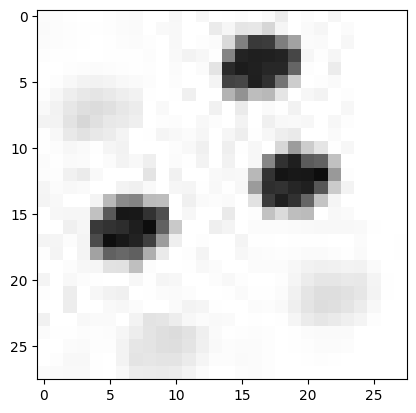

In [ ]:
plt.imshow(images_list[1])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax")
])

model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [ ]:

from keras.callbacks import EarlyStopping

es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

history = model.fit(x=X_train, y=y_train, epochs=100, validation_split=0.3, callbacks=[es1, es2])

model.summary()

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - loss: 3.4693 - sparse_categorical_accuracy: 0.0743 - val_loss: 3.2721 - val_sparse_categorical_accuracy: 0.0373
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 2.1444 - sparse_categorical_accuracy: 0.3780 - val_loss: 3.9006 - val_sparse_categorical_accuracy: 0.0267
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4112 - sparse_categorical_accuracy: 0.5920 - val_loss: 4.8807 - val_sparse_categorical_accuracy: 0.0267
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0185 - sparse_categorical_accuracy: 0.6952 - val_loss: 7.0454 - val_sparse_categorical_accuracy: 0.0267
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8921 - sparse_categorical_accuracy: 0.7353 - val_loss: 8.4953 - val_sparse_categorical_accuracy: 0.0267
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7387 - sparse_categorical_accuracy: 0.7717 - val_loss: 11.1218 - val_sparse_categorical_accuracy: 0.0267
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 576)                 │         332,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 576)                 │           2,304 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 288)                 │         166,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           7,514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,760,432 (6.72 MB)

 Trainable params: 586,298 (2.24 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 1,172,598 (4.47 MB)

In [ ]:
model.save("/content/braille_model.keras")
print("✅ Model saved successfully!")


✅ Model saved successfully!


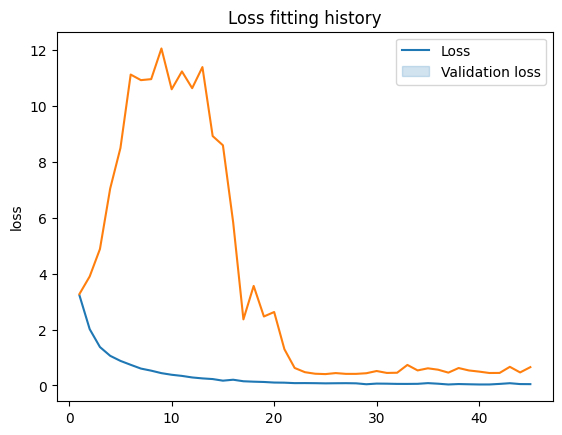

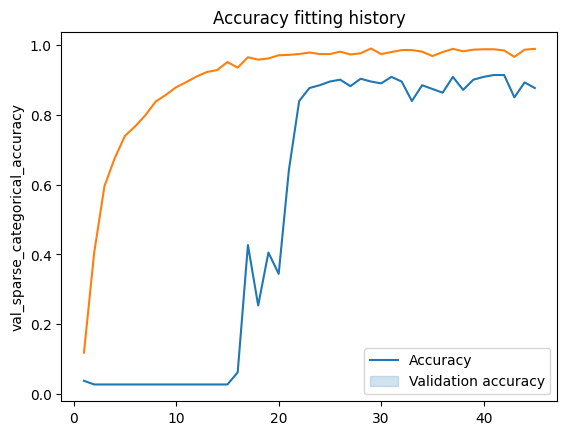

In [ ]:
time = np.arange(1, len(history.history['loss'])+1)

sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Validation accuracy'])
plt.show()

In [ ]:
print("Adam Optimizer")
model.evaluate(X_test, y_test)

model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

history = model.fit(x=X_train, y=y_train, epochs=100, validation_split=0.3, callbacks=[es1, es2])

model.summary()

Adam Optimizer
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.7344 - sparse_categorical_accuracy: 0.8716
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 0.1175 - sparse_categorical_accuracy: 0.9724 - val_loss: 0.6268 - val_sparse_categorical_accuracy: 0.8853
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0867 - sparse_categorical_accuracy: 0.9752 - val_loss: 0.5421 - val_sparse_categorical_accuracy: 0.9040
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4885 - val_sparse_categorical_accuracy: 0.9093
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0258 - sparse_categorical_accuracy: 0.9894 - val_loss: 2.0872 - val_sparse_categorical_accuracy: 0.7307
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9806 - val_loss: 2.1408 - val_sparse_categorical_accuracy: 0.6827
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.085

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 576)                 │         332,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 576)                 │           2,304 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 288)                 │         166,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           7,514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,174,134 (4.48 MB)

 Trainable params: 586,298 (2.24 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 586,300 (2.24 MB)

In [ ]:
model.save("/content/braille_model2.keras")
print("✅ Model saved successfully!")


✅ Model saved successfully!


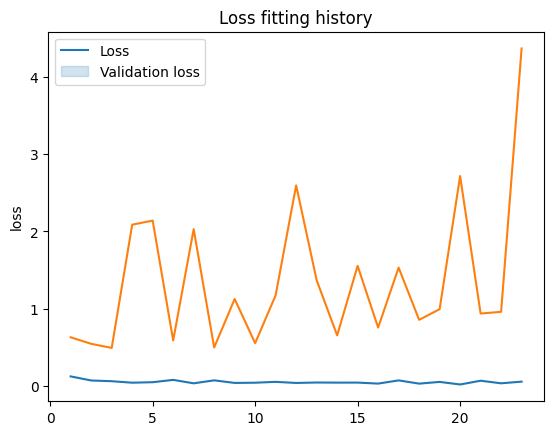

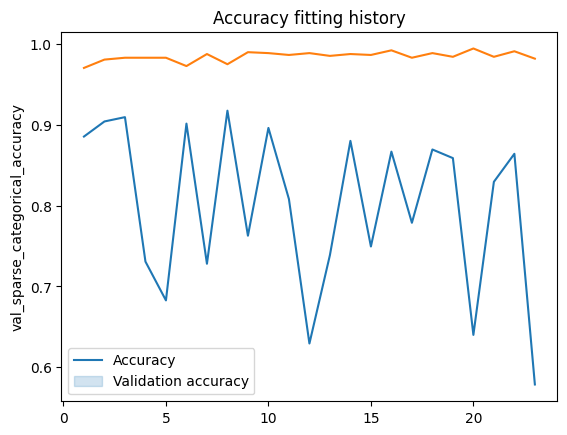

In [ ]:
time = np.arange(1, len(history.history['loss'])+1)

sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Validation accuracy'])
plt.show()

In [ ]:
print("RMSProp")
model.evaluate(X_test, y_test)

RMSProp
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 4.5098 - sparse_categorical_accuracy: 0.5547


[4.615224361419678, 0.5641025900840759]

In [ ]:

from tensorflow.keras.models import load_model
import cv2
import numpy as np
from pathlib import Path

# Load the trained model
model = load_model("/content/braille_model2.keras")  # Ensure this path is correct

# Load Label Encoder (if not already in memory)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.classes_ = np.array([chr(i) for i in range(65, 91)])  # A-Z ASCII uppercase letters


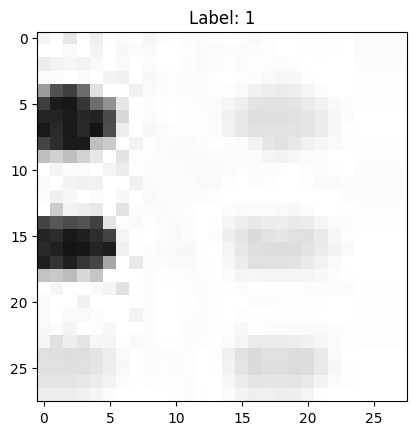

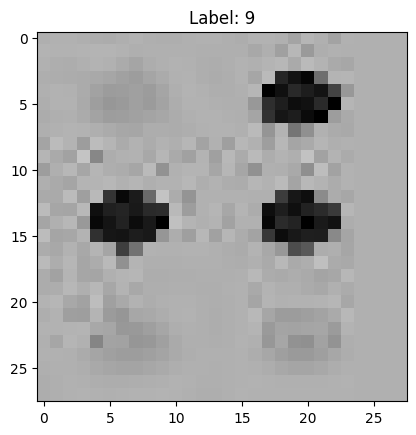

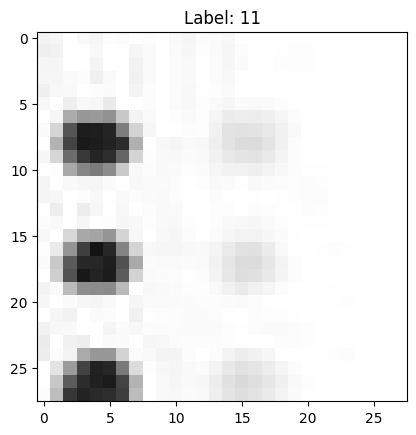

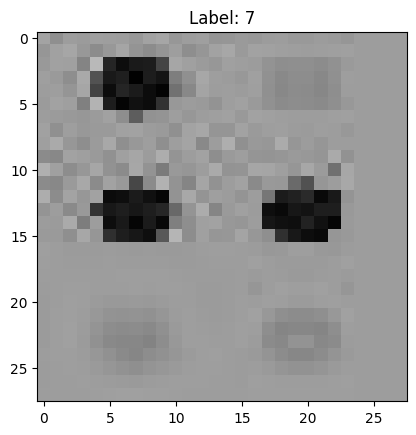

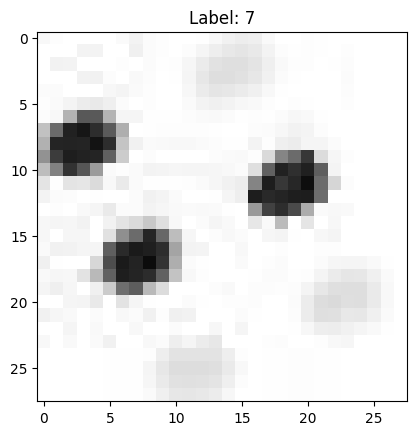

In [ ]:
import matplotlib.pyplot as plt

# Display a few images with their labels
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)


In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[es1, es2])


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 5.6230 - sparse_categorical_accuracy: 0.3224 - val_loss: 1.6708 - val_sparse_categorical_accuracy: 0.7212
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.2540 - sparse_categorical_accuracy: 0.3567 - val_loss: 1.0161 - val_sparse_categorical_accuracy: 0.7308
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.5992 - sparse_categorical_accuracy: 0.3715 - val_loss: 3.3789 - val_sparse_categorical_accuracy: 0.4744
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.3886 - sparse_categorical_accuracy: 0.4056 - val_loss: 1.6202 - val_sparse_categorical_accuracy: 0.6122
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.0601 - sparse_categorical_accuracy: 0.4793 - val_loss: 1.1344 - val_sparse_categorical_accuracy: 0.7019
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9603 - sparse_categorical_accuracy: 0.4590 - val_loss: 2.8070 - val_sparse_categorical_accuracy: 0.4615
Epoch 7/100
39/3

In [ ]:
model.save("/content/best_braille_model_with_class_weights.keras")


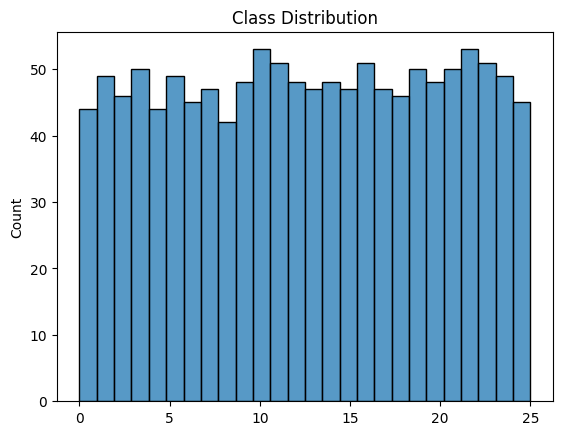

In [ ]:
import numpy as np
import seaborn as sns

sns.histplot(y_train, bins=len(np.unique(y_train)))
plt.title("Class Distribution")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the newly saved model
model = load_model("/content/best_braille_model_with_class_weights.keras")

# Now, you can use it for predictions


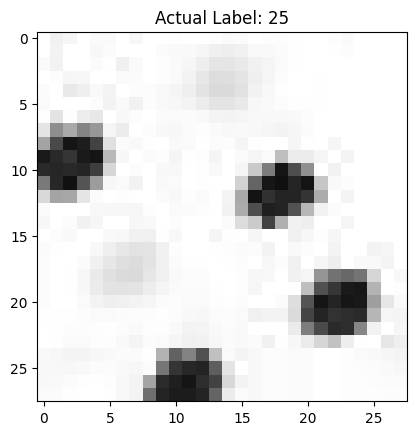

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
Predicted Label: 25


In [ ]:
import numpy as np

index = 0  # Change this to test different samples
image = X_test[index]
true_label = y_test[index]

plt.imshow(image)
plt.title(f"Actual Label: {true_label}")
plt.show()

# Reshape and predict
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")


In [ ]:
# Define the test image path
test_image_path = "/content/Braille_dataset/Braille Dataset/b1.JPG0rot.jpg"  # Change to the actual file path

# Load and preprocess the image
img = cv2.imread(test_image_path)
img = cv2.resize(img, (images_list.shape[1], images_list.shape[2]))  # Resize to match training data
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the character
pred = model.predict(img)
pred_class = np.argmax(pred)  # Get predicted class index
predicted_character = le.inverse_transform([pred_class])[0]  # Convert index to character

print(f"🔠 Predicted Braille Character: {predicted_character}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
🔠 Predicted Braille Character: B


In [ ]:
# Define the test image path
test_image_path = "/content/Braille_dataset/Braille Dataset/a1.JPG7whs.jpg"  # Change to the actual file path

# Load and preprocess the image
img = cv2.imread(test_image_path)
img = cv2.resize(img, (images_list.shape[1], images_list.shape[2]))  # Resize to match training data
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the character
pred = model.predict(img)
pred_class = np.argmax(pred)  # Get predicted class index
predicted_character = le.inverse_transform([pred_class])[0]  # Convert index to character

print(f"🔠 Predicted Braille Character: {predicted_character}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
🔠 Predicted Braille Character: A


In [ ]:
# Define the test image path
test_image_path = "/content/Braille_dataset/Braille Dataset/c1.JPG12whs.jpg"  # Change to the actual file path

# Load and preprocess the image
img = cv2.imread(test_image_path)
img = cv2.resize(img, (images_list.shape[1], images_list.shape[2]))  # Resize to match training data
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the character
pred = model.predict(img)
pred_class = np.argmax(pred)  # Get predicted class index
predicted_character = le.inverse_transform([pred_class])[0]  # Convert index to character

print(f"🔠 Predicted Braille Character: {predicted_character}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
🔠 Predicted Braille Character: C


In [ ]:
# Define the test image path
test_image_path = "/content/Braille_dataset/Braille Dataset/d1.JPG17dim.jpg"  # Change to the actual file path

# Load and preprocess the image
img = cv2.imread(test_image_path)
img = cv2.resize(img, (images_list.shape[1], images_list.shape[2]))  # Resize to match training data
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the character
pred = model.predict(img)
pred_class = np.argmax(pred)  # Get predicted class index
predicted_character = le.inverse_transform([pred_class])[0]  # Convert index to character

print(f"🔠 Predicted Braille Character: {predicted_character}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
🔠 Predicted Braille Character: D


In [ ]:
# Define the test image path
test_image_path = "/content/Braille_dataset/Braille Dataset/g1.JPG16whs.jpg"  # Change to the actual file path

# Load and preprocess the image
img = cv2.imread(test_image_path)
img = cv2.resize(img, (images_list.shape[1], images_list.shape[2]))  # Resize to match training data
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the character
pred = model.predict(img)
pred_class = np.argmax(pred)  # Get predicted class index
predicted_character = le.inverse_transform([pred_class])[0]  # Convert index to character

print(f"🔠 Predicted Braille Character: {predicted_character}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
🔠 Predicted Braille Character: G


In [ ]:
print(character_images.shape)  # This should print something like (n, 28, 28, 1)


(7, 28, 28, 1)


In [ ]:
# Normalize the pixel values between 0 and 1
character_images = character_images.astype('float32') / 255.0


In [ ]:
import numpy as np

# Ensure that character_images is a numpy array
character_images = np.array(character_images)
print(f"Character images shape: {character_images.shape}")


Character images shape: (7, 28, 28, 1)


In [ ]:
# Check the model's input shape
model.input_shape


(None, 28, 28, 3)

In [ ]:
print(f"Shape of single_image: {single_image.shape}")


Shape of single_image: (1, 28, 28, 1)


In [ ]:
single_image = single_image.astype('float32')
